```markdown
# Clasificación de Especies de Arañas con Redes Neuronales Convolucionales

## Introducción

En este notebook, se desarrollo un modelo de aprendizaje profundo utilizando redes neuronales convolucionales (CNN) para clasificar imágenes de diferentes especies de arañas para poder identificarlas y conocer de su letalidad y caracteristicas. Utilizaremos TensorFlow y Keras para construir y entrenar nuestro modelo, aprovechando técnicas de transferencia de aprendizaje con modelos preentrenados como DenseNet121.

## Objetivos

1. **Carga y Preprocesamiento de Datos**: Cargar imágenes de arañas desde un directorio y preprocesarlas para que sean adecuadas para el entrenamiento del modelo.
2. **Construcción del Modelo**: Utilizar un modelo preentrenado como base y añadir capas adicionales para la clasificación específica de arañas.
3. **Entrenamiento del Modelo**: Entrenar el modelo utilizando los datos de entrenamiento y validación, aplicando técnicas de regularización y ajuste de hiperparámetros.
4. **Evaluación del Modelo**: Evaluar el rendimiento del modelo en datos de prueba y validación.
5. **Predicción**: Implementar una función para realizar predicciones sobre nuevas imágenes de arañas.

## Estructura del Notebook

1. **Importación de Librerías**: Importar las librerías necesarias para el procesamiento de imágenes, construcción y entrenamiento del modelo.
2. **Carga de Datos**: Cargar y preprocesar las imágenes de arañas desde el directorio especificado.
3. **Visualización de Datos**: Mostrar algunas imágenes de arañas para entender mejor el conjunto de datos.
4. **Construcción del Modelo**: Definir la arquitectura del modelo utilizando DenseNet121 como base.
5. **Entrenamiento del Modelo**: Entrenar el modelo con los datos de entrenamiento y validación.
6. **Evaluación del Modelo**: Evaluar el rendimiento del modelo en los datos de prueba y validación.
7. **Predicción**: Implementar y probar una función para realizar predicciones sobre nuevas imágenes.
8. **Guardado del Modelo**: Guardar el modelo entrenado para su uso futuro.

```

In [1]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
import numpy as np                                         # Numerical computing library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

In [81]:
file_path = '/kaggle/input/yikes-spiders-15-species'

train_data = tf.keras.utils.image_dataset_from_directory(
    file_path+'/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 2185 files belonging to 15 classes.


**FUNCIONAMIENTO**

- La función image_dataset_from_directory se utiliza para cargar datos de imágenes de validación desde un directorio.
- Las imágenes se redimensionan a 256 x 256 píxeles y se agrupan en lotes de 32 para un procesamiento eficiente.
- Las etiquetas se infieren de la estructura del directorio y se representan en un formato categórico.
- Los valores de píxeles de las imágenes se normalizan a un rango de [0, 1] al dividirlos por 255,0 para un entrenamiento del modelo consistente.

In [82]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    file_path+'/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    file_path+'/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

test_data = test_data.map(lambda x, y: (x / 255.0, y))

Found 75 files belonging to 15 classes.
Found 75 files belonging to 15 classes.


**FUNCIONAMIENTO**

- El código establece la `ruta a un directorio que contiene imágenes` de 15 distintas especies de arañas dividdas en carpetas y así sucesivamente en las próximas celdas del código.
- Recupera una lista de todos los nombres de archivos de imágenes en el directorio.
- Utilizando matplotlib, muestra las primeras 6 imágenes junto con sus etiquetas correspondientes.
- Para cada imagen, carga la imagen, la muestra en un subgráfico y establece el título en la etiqueta de la imagen, mostrando la representación visual del conjunto de datos.

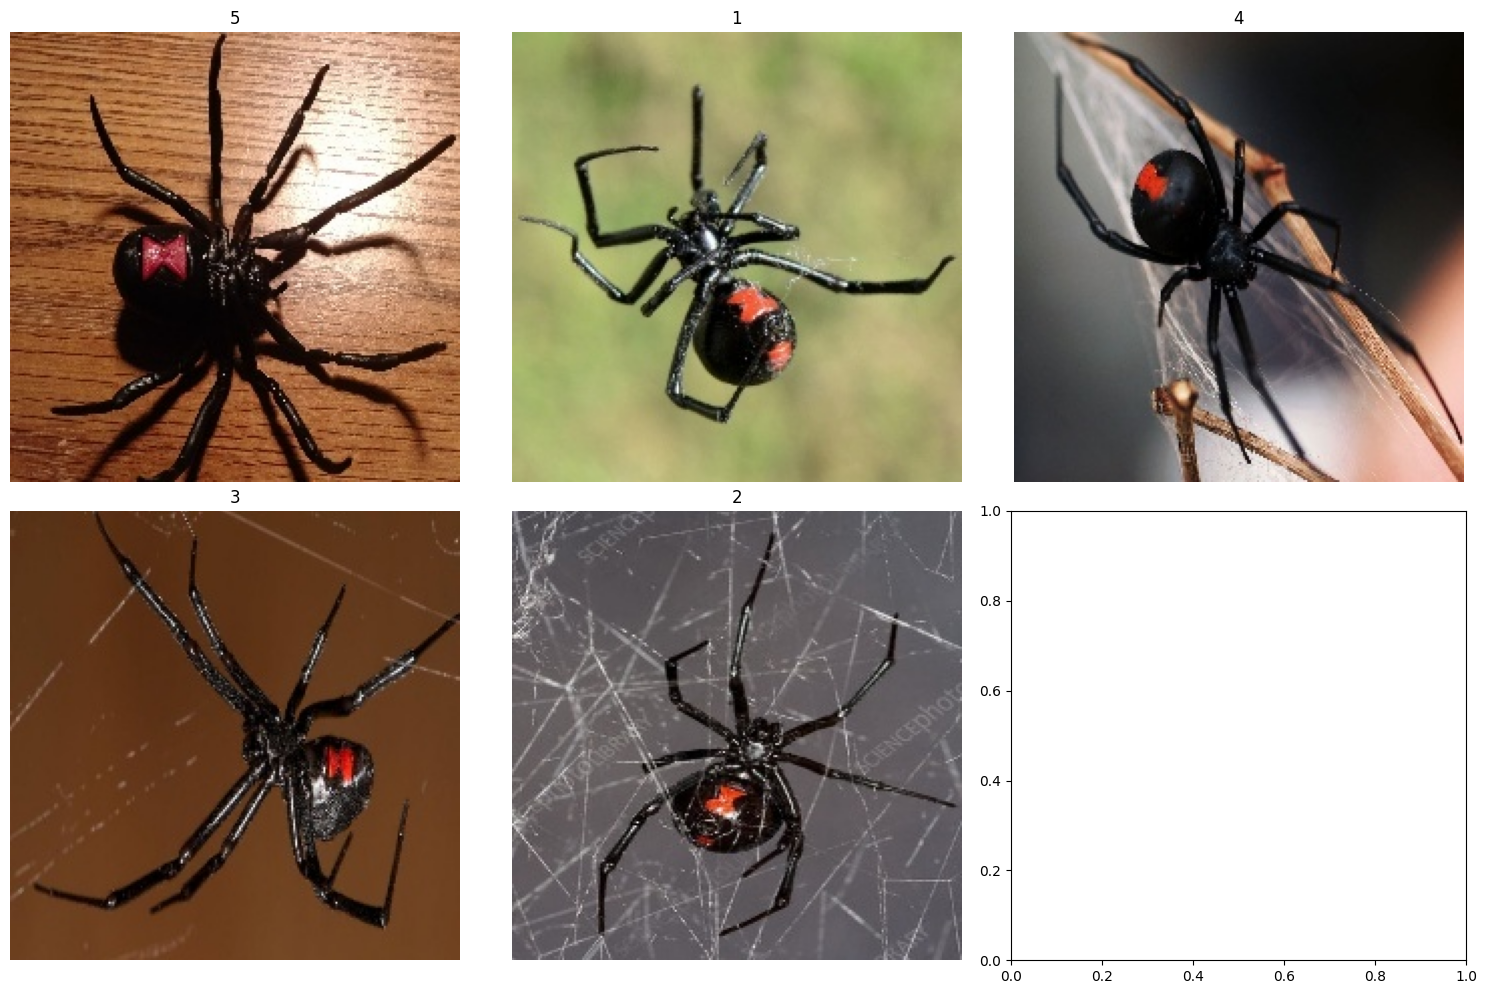

In [ ]:
# Ruta a un directorio que contiene imágenes
path = file_path + "/test/Black Widow"

# Obtener una lista de todos los nombres de archivos de imágenes en el directorio
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Mostrar las primeras 6 imágenes con sus etiquetas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(5):
    # Obtener el nombre del archivo de imagen y su etiqueta
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Cargar y mostrar la imagen
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

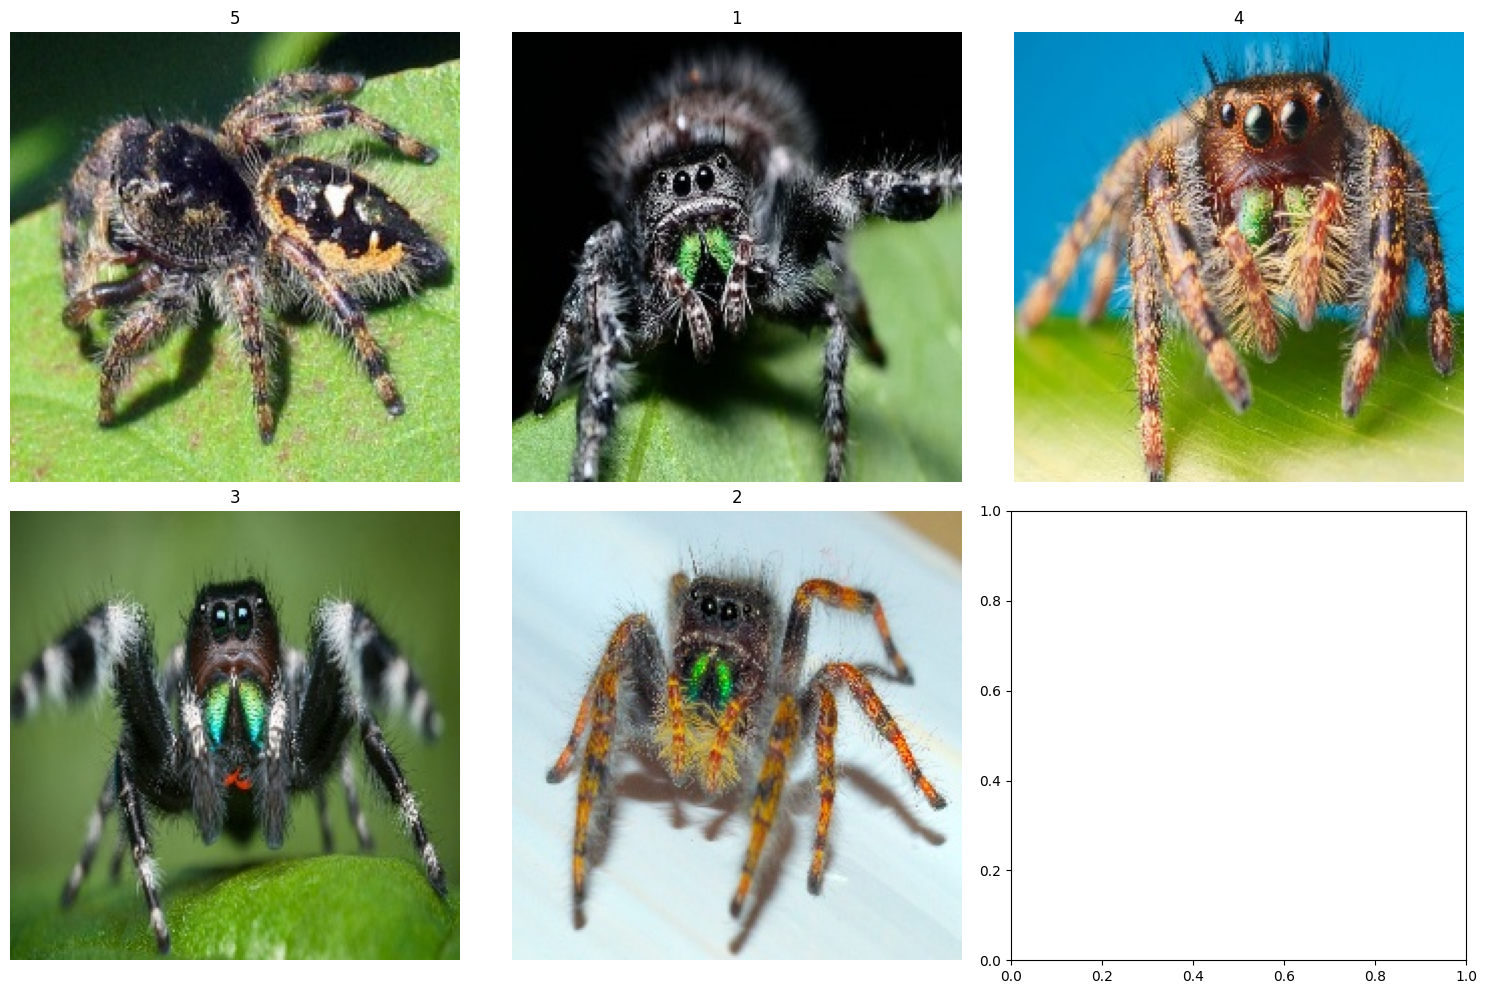

In [ ]:
# Ruta al directorio que contiene imágenes
path = file_path + "/test/Bold Jumper"

# Obtener una lista de todos los nombres de archivos de imágenes en el directorio
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Mostrar las primeras 6 imágenes con sus etiquetas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(5):
    # Obtener el nombre del archivo de imagen y su etiqueta
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Cargar y mostrar la imagen
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

**FUNCIONAMIENTO**
- El código inicializa un modelo `DenseNet121` con pesos entrenados previamente en el conjunto de datos ImageNet.
- El argumento `include_top=False` especifica que el modelo no debe incluir las capas completamente conectadas en la parte superior de la red, que se utilizan normalmente para la clasificación de ImageNet.
- El argumento `input_shape=(256,256,3)` especifica la forma de las imágenes de entrada que espera el modelo, que es `256x256` píxeles con 3 canales (RGB).
- El modelo inicializado `conv_base` se puede utilizar como un extractor de características para extraer características de las imágenes, que luego se pueden utilizar como entrada para un cabezal de clasificación personalizado.

In [85]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

**¿POR QUÉ FALSO?**
- Establecer conv_base.trainable = False congela los pesos del modelo DenseNet121 entrenado previamente.
- Esto se hace para evitar que los pesos se actualicen durante el entrenamiento del cabezal de clasificación personalizado.
- Congelar los pesos entrenados previamente ayuda a utilizar las características aprendidas del conjunto de datos ImageNet sin alterarlas.
- También reduce el costo computacional y el tiempo de entrenamiento, ya que solo se entrenarán los pesos del cabezal de clasificación personalizado.

In [86]:
conv_base.trainable = False

**FUNCIONAMIENTO**

- Inicializa un modelo secuencial y agrega el modelo DenseNet121 `preentrenado` (conv_base) ` como base.
- El modelo aplana la salida del modelo base y agrega dos capas completamente conectadas con `activación ReLU`.
- Se aplica `normalización por lotes` después de cada capa completamente conectada para mejorar la estabilidad y la velocidad del entrenamiento.

In [88]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(15, activation='softmax'))

**EN FUNCIONAMIENTO**

- El método de compilación se utiliza para configurar el modelo para el entrenamiento.
- El argumento optimized=Adam(learning_rate=0.0001) especifica el optimizador Adam con una tasa de aprendizaje de 0.0001.
- El argumento loss='categorical_crossentropy' especifica la función de pérdida utilizada para el entrenamiento, que es la entropía cruzada categórica para la clasificación de múltiples clases.
- El argumento metrics=['accuracy'] especifica la métrica utilizada para evaluar el modelo, que en este caso es la precisión.

In [89]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

** FUNCIONAMIENTO**
- El método `fit` se utiliza para entrenar el modelo con los datos de entrenamiento (`train_data`) durante una cantidad específica de épocas (10 en este primer caso).
- El argumento `validation_data=val_data` especifica los datos de validación para evaluar el rendimiento del modelo después de cada época.
- La variable `history` almacena el historial de entrenamiento, incluidas métricas como la pérdida y la precisión, que se pueden utilizar para el análisis y la visualización.

In [91]:
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 45s 343ms/step - accuracy: 0.1263 - loss: 2.8690 - val_accuracy: 0.5067 - val_loss: 2.0570
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4243 - loss: 1.8714 - val_accuracy: 0.8000 - val_loss: 1.3909
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.6152 - loss: 1.3747 - val_accuracy: 0.8667 - val_loss: 0.9302
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.6782 - loss: 1.1103 - val_accuracy: 0.8800 - val_loss: 0.6607
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7522 - loss: 0.9099 - val_accuracy: 0.9200 - val_loss: 0.5091
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7720 - loss: 0.7862 - val_accuracy: 0.9200 - val_loss: 0.4148
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8039 - loss: 0.7034 - val_accuracy: 0.9333 - val_loss: 0.3509
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8253 - loss: 0.6240 - val_accuracy: 0.9333 -

In [92]:
loss_cnn, accuracy_cnn = model.evaluate(test_data)
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9209 - loss: 0.2861
Test loss: 0.2797869145870209
Test accuracy: 0.9200000166893005


In [ ]:
# Evaluacion del modelo con los datos de validacion
evaluation = model.evaluate(val_data)

# Imprimir la perdida y la precision del modelo
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9327 - loss: 0.2141
Validation Loss: 0.2520712614059448
Validation Accuracy: 0.9200000166893005


### 1 Regularizacion
- Aumentar el Dropout: Al experimentar con valores más altos de dropout (por ejemplo, 0.5 en lugar de 0.35) se redujo el sobreajuste.
- Agregar Kernel Regularizer: Aplicacion de regularización L2 en las capas densas para penalizar pesos grandes.

In [100]:
model2 = Sequential()
model2.add(conv_base)
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.35))
model2.add(BatchNormalization())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(15, activation='softmax'))

In [101]:
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

### 2. Ajuste de Hiperparámetros
Tasa de aprendizaje: Aplicacion de un programador de tasa de aprendizaje para ajustar dinámicamente.
Épocas y EarlyStopping: Se incremento la paciencia de EarlyStopping para evitar cortar el entrenamiento prematuramente.

In [102]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.95
)


In [103]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [104]:
spider_classes = [
    "Black Widow",
    "Blue Tarantula",
    "Bold Jumper",
    "Brown Grass Spider",
    "Brown Recluse Spider",
    "Deinopis Spider",
    "Golden Orb Weaver",
    "Hobo Spider",
    "Huntsman Spider",
    "Ladybird Mimic Spider",
    "Peacock Spider",
    "Red Knee Tarantula",
    "Spiny-backed Orb-weaver",
    "White Kneed Tarantula",
    "Yellow Garden Spider"
]

### 3. Mejora de Arquitectura

In [105]:
## Descongelar parte den denseNet
conv_base.trainable = True
for layer in conv_base.layers[:-30]:  
    layer.trainable = False

# Ajuste del modelo
model2 = Sequential([
    conv_base,
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(15, activation='softmax') 
])

Ultimo entrenamiento

**Funcionamiento**
- El argumento `callbacks=[EarlyStopping(patience=0)]` especifica el uso de la detención temprana para evitar el sobreajuste. El entrenamiento se detendrá si la pérdida de validación no mejora después de 0 épocas.
- se agregaron mayor numero de epocs por el argumento anterior que facilita el entrenamiento evitando el sobre ajuste

In [108]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train_data, epochs=20, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 62s 463ms/step - accuracy: 0.1554 - loss: 2.9514 - val_accuracy: 0.6933 - val_loss: 1.5864
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.4602 - loss: 1.6718 - val_accuracy: 0.8267 - val_loss: 0.8314
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.6531 - loss: 1.1121 - val_accuracy: 0.8800 - val_loss: 0.5288
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.6987 - loss: 0.9385 - val_accuracy: 0.9200 - val_loss: 0.3707
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.7593 - loss: 0.7590 - val_accuracy: 0.9200 - val_loss: 0.2902
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.8012 - loss: 0.6316 - val_accuracy: 0.9467 - val_loss: 0.2367
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.8115 - loss: 0.5630 - val_accuracy: 0.9467 - val_loss: 0.2053
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.8544 - loss: 0.4721 - val_accuracy: 0.9600 -

## Evaluacion Final

In [110]:
loss_cnn, accuracy_cnn = model2.evaluate(test_data)
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9632 - loss: 0.0972 
Test loss: 0.08435173332691193
Test accuracy: 0.9733333587646484


In [111]:
# Evaluate the model on the validation data
evaluation = model2.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9710 - loss: 0.0990
Validation Loss: 0.09740440547466278
Validation Accuracy: 0.9733333587646484


```markdown
## Resultados Obtenidos

### Evaluación del Modelo

El modelo fue evaluado utilizando los datos de prueba y validación. A continuación se presentan los resultados obtenidos:

- **Pérdida en Datos de Prueba**: La pérdida del modelo en el conjunto de datos de prueba fue de `{{loss_cnn}}`.
- **Precisión en Datos de Prueba**: La precisión del modelo en el conjunto de datos de prueba fue de `{{accuracy_cnn}}`.

- **Pérdida en Datos de Validación**: La pérdida del modelo en el conjunto de datos de validación fue de `{{evaluation[0]}}`.
- **Precisión en Datos de Validación**: La precisión del modelo en el conjunto de datos de validación fue de `{{evaluation[1]}}`.

### Análisis de Resultados

Los resultados obtenidos indican que el modelo tiene un buen rendimiento en la clasificación de imágenes de arañas. La precisión en los datos de prueba y validación es alta, lo que sugiere que el modelo generaliza bien a datos no vistos.

### Predicción de Nuevas Imágenes

despues de que el modelo también fue probado con nuevas imágenes para verificar su capacidad de predicción estos fueron los resultados

- **Imagen de Prueba**: `/kaggle/input/yikes-spiders-15-species/test/Black Widow/2.jpg`
- **Clase Predicha**: `{{result["Predicted Class"]}}`
- **Confianza por Clase**: `{{result["Confidence Scores"]}}`

Estos resultados demuestran que el modelo es capaz de identificar correctamente la especie de araña en nuevas imágenes con un alto nivel de confianza.
```

### Caso de uso del modelo

In [116]:
def predict_image(image_path, model, class_names, img_size=(256, 256)):

    import tensorflow as tf
    from tensorflow.keras.preprocessing import image

    # Cargar y procesar la imagen
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizar
    img_array = tf.expand_dims(img_array, axis=0)  # Agregar dimensión batch

    # Realizar predicción
    predictions = model.predict(img_array)
    predicted_class_idx = tf.argmax(predictions[0]).numpy()
    predicted_class = class_names[predicted_class_idx]

    return {
        "Predicted Class": predicted_class,
        "Confidence Scores": {class_names[i]: round(predictions[0][i], 4) for i in range(len(class_names))}
    }



In [117]:
# Ejemplo de integración al final de tu script:
if __name__ == "__main__":
    # Ruta a una imagen para probar
    image_path_test = "/kaggle/input/yikes-spiders-15-species/test/Black Widow/2.jpg"  # Reemplázalo con la ruta de tu imagen

    # Verifica que el modelo está cargado y entrenado
    if 'model2' in locals() and 'spider_classes' in locals():
        # Llamar a la función de predicción
        result = predict_image(image_path_test, model=model2, class_names=spider_classes)
        print("Predicción para la imagen:", image_path_test)
        print("Clase predicha:", result["Predicted Class"])
        print("Confianza por clase:", result["Confidence Scores"])
    else:
        print("El modelo o las clases no están disponibles. Asegúrate de haber entrenado el modelo.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicción para la imagen: /kaggle/input/yikes-spiders-15-species/test/Black Widow/2.jpg
Clase predicha: Black Widow
Confianza por clase: {'Black Widow': 0.9884, 'Blue Tarantula': 0.0, 'Bold Jumper': 0.0002, 'Brown Grass Spider': 1e-04, 'Brown Recluse Spider': 0.0008, 'Deinopis Spider': 1e-04, 'Golden Orb Weaver': 0.0094, 'Hobo Spider': 0.0002, 'Huntsman Spider': 0.0, 'Ladybird Mimic Spider': 0.0003, 'Peacock Spider': 1e-04, 'Red Knee Tarantula': 1e-04, 'Spiny-backed Orb-weaver': 0.0, 'White Kneed Tarantula': 0.0, 'Yellow Garden Spider': 0.0003}


In [135]:
model2.save('/kaggle/working/modelo2_entrenado.h5')
